In [1]:
# IMPORTING TORCH LIBRARIES
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
# IMPORTING THE MNIST DATASET
train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
# "FORMATTING" THE DATASET
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
# DEFINING THE FORWARD FEED NEURAL NETWORK
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
        
net = Net()
print(net)
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [11]:
# TESTING THE NN DEFINITION
X = torch.rand((28, 28))
X = X.view(-1, 28*28)

output = net(X)
print(output)


In [14]:
# TRAINING THE NETWORK
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
print("---Finished Training---")

tensor(0.3688, grad_fn=<NllLossBackward>)
tensor(0.0496, grad_fn=<NllLossBackward>)
tensor(0.0898, grad_fn=<NllLossBackward>)


In [16]:
# GETTING THE DEGREE OF ACCURACY ON TRAINING DATA
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.977


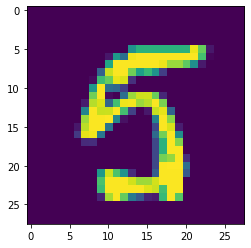

In [29]:
# DISPLAYING GROUND TRUTH FROM A TRAINING DATA ELEM
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28))
plt.show()

In [30]:
# DISPLAYING THE NETWORKS PREDICTION ON TRAINING DATA ELEM
print(torch.argmax(net(X[3].view(-1, 28*28))[0]))

tensor(5)


In [41]:
# GETTING THE DEGREE OF ACCURACY ON TESTING DATA
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.989


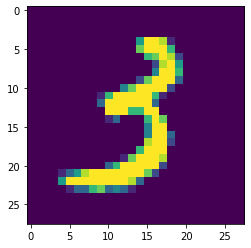

In [42]:
# DISPLAYING GROUND TRUTH FROM A TESTING DATA ELEM
import matplotlib.pyplot as plt
plt.imshow(X[9].view(28,28))
plt.show()

In [43]:
# DISPLAYING THE NETWORKS PREDICTION ON TRAINING DATA ELEM
print(torch.argmax(net(X[9].view(-1, 28*28))[0]))



tensor(3)
